In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
lp2017=pd.read_csv("./input/연령별퇴사/2017.csv")
lp2017

,성별(1),연령별(1),2017,2017.1,2017.2,2017.3,2017.4
0,성별(1),연령별(1),총계,진입자,유지자,이동자,미등록자
1,총계,총계,23379,3857,15648,3873,3404
2,총계,15-29세,3921,1372,1688,860,973
3,총계,30-39세,5085,630,3643,812,598
4,총계,40-49세,5854,640,4340,873,604
5,총계,50-59세,5220,617,3800,803,638
6,총계,60세 이상,3299,597,2177,526,592
7,남자,총계,13642,1908,9374,2359,1741
8,남자,15-29세,2005,738,830,437,508
9,남자,30-39세,3097,309,2250,537,288


In [39]:
lp2017 = pd.read_csv("./input/연령별퇴사/2017.csv", skiprows=2)
data1 = lp2017.iloc[:5, :]



data1_1 = data1.iloc[:, -2]
data1_1
data1_2 = data1.iloc[:, -4:-1].sum(axis=1)
data1_2
l1 = []
l2 = []
for i in range(len(data1_1)):
    l1.append(data1_1.iloc[i])
    l2.append(data1_2.iloc[i])

l1
l2

ratio2017=[]

for i in range(len(l1)):
    ratio2017.append(l1[i]/l2[i]*100)
ratio2017

[21.93877551020408,
 15.968534906588003,
 14.915427985648385,
 15.383141762452107,
 15.93939393939394]

In [40]:
satisfied2017 = pd.read_excel("./input/2017/근로환경_만족도_2017.xlsx", skiprows=4)
satisfied2017 = satisfied2017.iloc[:, 1:]
satisfied2017
data2 = satisfied2017.iloc[:6, :-1]
data2_1 = data2.iloc[0, -2]
data2_2 = data2.iloc[0, -1]
data2_3 = data2.iloc[0, 1]
print(data2_1, data2_2, data2_3)

data3_1 = data2.iloc[1, -2]
data3_2 = data2.iloc[1, -1]
data3_3 = data2.iloc[1, 1]
print(data3_1, data3_2, data3_3)

datal1 = [data2_1, data2_2, data2_3]
datal2 = [data3_1, data3_2, data3_3]
data1529 = int(data2_1*data2_3/100+0.5)+int(data2_2*data2_3/100+0.5) + \
    int(data3_1*data3_3/100+0.5)+int(data3_2*data3_3/100+0.5)
total = data2_3+data3_3
data_list = []
print(data1529, total)
data15_29=data1529/total*100
print(data15_29)


list_satisfied=[data15_29]
datalist=data2.iloc[2:,-2:].sum(axis=1)
datalist

for i in range(len(datalist)):
  list_satisfied.append(datalist.iloc[i])
list_satisfied

19.9 2.0 417
16.7 2.8 7002
1456 7419
19.625286426742147


c:\Users\dawoo\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


[19.625286426742147, 18.3, 21.0, 26.0, 30.900000000000002]

In [72]:
# mean = mean = int(pd.Series(ratio2017).mean()+0.5)
df = pd.DataFrame({"불만족": list_satisfied, "신입_퇴사자": ratio2017})


# df["퇴사율"] = (df["신입_퇴사자"] > mean).astype(int)


X = df["불만족"]


y = df["신입_퇴사자"]



correlation_not_reasonable_concede = X.corr(y)



# print(mean)


# print(df)


print(f"불만족과 이동자의 상관관계 : {correlation_not_reasonable_concede}")
df

불만족과 이동자의 상관관계 : -0.34412661326864236


,불만족,신입_퇴사자
0,19.625286,21.938776
1,18.300000,15.968535
2,21.000000,14.915428
3,26.000000,15.383142
4,30.900000,15.939394


In [73]:
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "불만족": list_satisfied,
    "신입_퇴사자": ratio2017
})

mean = int(df["신입_퇴사자"].mean() + 0.5)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

filtered_df = df[(df >= (Q1 - 1.5 * IQR)) & (df <= (Q3 + 1.5 * IQR))].dropna()

X = filtered_df["불만족"]
y = filtered_df["신입_퇴사자"]

corr_matrix = filtered_df.corr()

print(f"불만족과 신입_퇴사자 상관관계 : {corr_matrix.iloc[0, 1]}")
print(f"평균 퇴사율 (mean): {mean}")

print(filtered_df)


불만족과 신입_퇴사자 상관관계 : 0.222817165965671
평균 퇴사율 (mean): 17
    불만족     신입_퇴사자
1  18.3  15.968535
2  21.0  14.915428
3  26.0  15.383142
4  30.9  15.939394


In [42]:
wlb = pd.read_excel("./input/2017/직업_이외의_활동_참여_빈도_2017.xlsx")
wlb = wlb.iloc[5:11, 2:5]
wlb
wlb_edu15_total = wlb.iloc[0, 0]
wlb_edu15_1 = wlb.iloc[0, 1]
wlb_edu15_2 = wlb.iloc[0, 2]
print(wlb_edu15_total, wlb_edu15_1, wlb_edu15_2)

wlb_edu20_total = wlb.iloc[1, 0]
wlb_edu20_1 = wlb.iloc[1, 1]
wlb_edu20_2 = wlb.iloc[1, 2]
print(wlb_edu20_total, wlb_edu20_1, wlb_edu20_2)

wlb_edu_15_29 = (wlb_edu15_1*wlb_edu15_total+wlb_edu15_2*wlb_edu15_total+wlb_edu20_1 *
                 wlb_edu20_total+wlb_edu20_2*wlb_edu15_total)/(wlb_edu15_total+wlb_edu20_total)

list_edu=[wlb_edu_15_29]
data=wlb.iloc[2:,1:].sum(axis=1)
data

for i in range(len(data)):
  list_edu.append(data.iloc[i])

list_edu


200 2.8 1.4
3979 6.9 3.8


[6.952644173247188, 46.6, 32.5, 7.8, 2.9000000000000004]

In [43]:
wlb = pd.read_excel("./input/2017/직업_이외의_활동_참여_빈도_2017.xlsx")
wlb = wlb.iloc[5:11, 8:11]
wlb
wlb_cook15_total = wlb.iloc[0, 0]
wlb_cook15_1 = wlb.iloc[0, 1]
wlb_cook15_2 = wlb.iloc[0, 2]
print(wlb_cook15_total, wlb_cook15_1, wlb_cook15_2)

wlb_cook20_total = wlb.iloc[1, 0]
wwlb_cook20_1 = wlb.iloc[1, 1]
wlb_cook20_2 = wlb.iloc[1, 2]
print(wlb_cook20_total, wwlb_cook20_1, wlb_cook20_2)

wlb_cook_15_29 = (wlb_cook15_1*wlb_cook15_total+wlb_cook15_2*wlb_cook15_total+wwlb_cook20_1 *
                 wlb_cook20_total+wlb_cook20_2*wlb_cook20_total)/(wlb_cook15_total+wlb_cook20_total)

list_cook=[wlb_cook_15_29]
data=wlb.iloc[2:,1:].sum(axis=1)
data

for i in range(len(data)):
  list_cook.append(data.iloc[i])

list_cook


417 9.3 11.3
6999 11.2 17.2


[27.96140776699029, 48.599999999999994, 49.6, 46.4, 48.099999999999994]

In [44]:
wlb = pd.read_excel("./input/2017/직업_이외의_활동_참여_빈도_2017.xlsx")
wlb = wlb.iloc[5:11, 20:26]
wlb
wlb_develope15_total = wlb.iloc[0, 0]
wlb_develope15_1 = wlb.iloc[0, -1]
wlb_develope15_2 = wlb.iloc[0, -2]
print(wlb_develope15_total, wlb_develope15_1, wlb_develope15_2)

wlb_develope20_total = wlb.iloc[1, 0]
wlb_develope20_1 = wlb.iloc[1, -1]
wlb_develope20_2 = wlb.iloc[1, -2]
print(wlb_develope20_total, wlb_develope20_1, wlb_develope20_2)

wlb_cook_15_29 = (wlb_develope15_1*wlb_develope15_total+wlb_develope15_2*wlb_develope15_total+wlb_develope20_1 *
                 wlb_develope20_total+wlb_develope20_2*wlb_develope20_total)/(wlb_develope15_total+wlb_develope20_total)

list_develope=[wlb_cook_15_29]
data=wlb.iloc[2:,-2:].sum(axis=1)
data

for i in range(len(data)):
  list_develope.append(data.iloc[i])

list_develope


417 53.6 20.2
6997 52.6 23.4


[75.87626112759644, 80.9, 84.6, 88.80000000000001, 95.80000000000001]

In [45]:
wlb = pd.read_excel("./input/2017/직업_이외의_활동_참여_빈도_2017.xlsx")
wlb = wlb.iloc[5:11, 26:]
wlb
wlb_workout15_total = wlb.iloc[0, 0]
wlb_workout15_1 = wlb.iloc[0, -1]
wlb_workout15_2 = wlb.iloc[0, -2]
print(wlb_workout15_total, wlb_workout15_1, wlb_workout15_2)

wlb_workout20_total = wlb.iloc[1, 0]
wlb_workout20_1 = wlb.iloc[1, -1]
wlb_workout20_2 = wlb.iloc[1, -2]
print(wlb_workout20_total, wlb_workout20_1, wlb_workout20_2)

wlb_cook_15_29 = (wlb_workout15_1*wlb_workout15_total+wlb_workout15_2*wlb_workout15_total+wlb_workout20_1 *
                 wlb_workout20_total+wlb_workout20_2*wlb_workout20_total)/(wlb_workout15_total+wlb_workout20_total)

list_workout=[wlb_cook_15_29]
data=wlb.iloc[2:,-2:].sum(axis=1)
data

for i in range(len(data)):
  list_workout.append(data.iloc[i])

list_workout


417 27.6 17.8
6998 23.8 23.1


[46.815643964935944, 50.400000000000006, 55.4, 60.599999999999994, 74.4]

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
# sns.set(font="Malgun Gothic", rc={"axes.unicode_minus": False})

# df = pd.DataFrame(
#     {"2017퇴사율": ratio2017, "근로환경불만족": list_satisfied, "요리 및 집안일": list_cook, "자기계발": list_develope, "자녀양육": list_edu, "운동": list_workout})

# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# filtered_df = df[~((df < (Q1 - 1.5 * IQR)) |
#                    (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(filtered_df)

# corr_matrix = filtered_df.corr()
# corr_matrix

# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.xticks(rotation=15)
# plt.title('상관관계 분석')
# plt.show()

# print(df.describe())

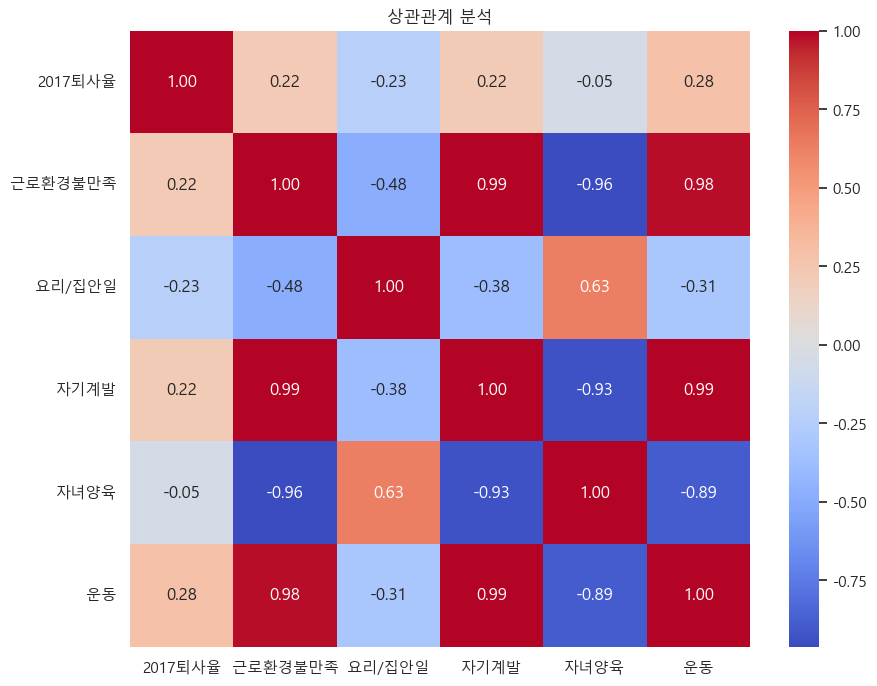

         2017퇴사율    근로환경불만족     요리/집안일       자기계발       자녀양육         운동
count   4.000000   4.000000   4.000000   4.000000   4.000000   4.000000
mean   15.551625  24.050000  48.175000  87.525000  22.450000  60.200000
std     0.502431   5.570458   1.337597   6.391335  20.664382  10.342147
min    14.915428  18.300000  46.400000  80.900000   2.900000  50.400000
25%    15.266213  20.325000  47.675000  83.675000   6.575000  54.150000
50%    15.661268  23.500000  48.350000  86.700000  20.150000  58.000000
75%    15.946679  27.225000  48.850000  90.550000  36.025000  64.050000
max    15.968535  30.900000  49.600000  95.800000  46.600000  74.400000


In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임 생성
df = pd.DataFrame({
    "2017퇴사율": ratio2017,
    "근로환경불만족": list_satisfied,
    "요리/집안일": list_cook,
    "자기계발": list_develope,
    "자녀양육": list_edu,
    "운동": list_workout
})

# IQR 계산 및 이상치 제거
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# 이상치를 벗어난 데이터를 제거
filtered_df = df[(df >= (Q1 - 1.5 * IQR)) & (df <= (Q3 + 1.5 * IQR))].dropna()

# 상관관계 계산
corr_matrix = filtered_df.corr()

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.yticks(rotation=0)
plt.title('상관관계 분석')
plt.show()

# 데이터 통계 출력
print(filtered_df.describe())


In [89]:
# sns.set(font="Malgun Gothic", rc={"axes.unicode_minus": False})

# df = pd.DataFrame(
#     {"2017퇴사율": ratio2017, "근로환경불만족": list_satisfied, "요리/집안일": list_cook, "자기계발": list_develope, "자녀양육": list_edu, "운동": list_workout})

# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(df)

# data = scaled_data
# columns = ["2017 퇴사율", "근로환경불만족", "요리/집안일", "자기계발", "자녀양육", "운동"]
# dataframe = pd.DataFrame(data, columns=columns)
# corr_matrix = dataframe.corr()
# corr_matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.yticks(rotation=0)
# plt.title('상관관계 분석')
# plt.show()

# print(dataframe.describe())

In [90]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.pairplot(df)
# plt.show()


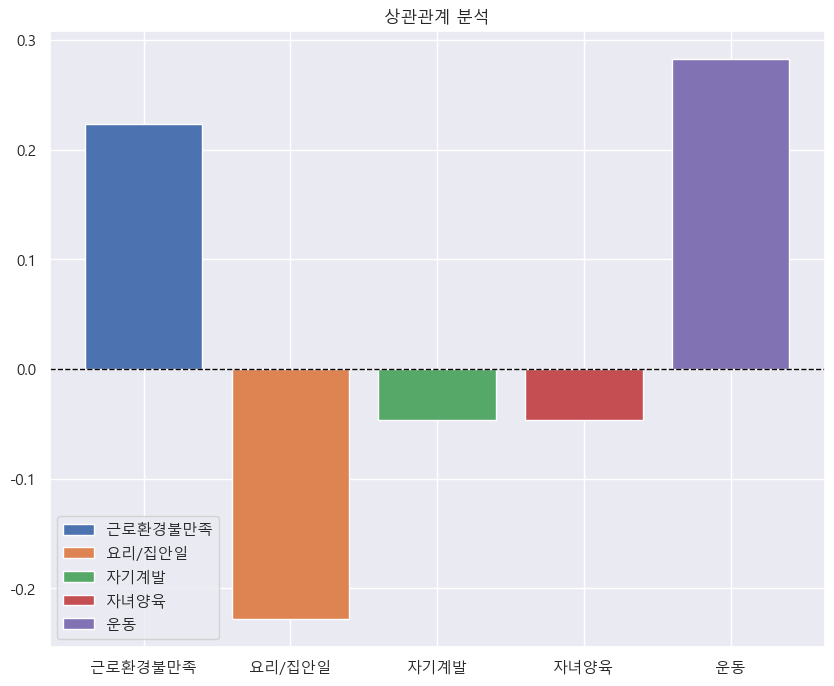

         2017퇴사율    근로환경불만족     요리/집안일       자기계발       자녀양육         운동
count   5.000000   5.000000   5.000000   5.000000   5.000000   5.000000
mean   16.829055  23.165057  44.132282  85.195252  19.350529  57.523129
std     2.889371   5.214223   9.113711   7.601020  19.191042  10.772567
min    14.915428  18.300000  27.961408  75.876261   2.900000  46.815644
25%    15.383142  19.625286  46.400000  80.900000   6.952644  50.400000
50%    15.939394  21.000000  48.100000  84.600000   7.800000  55.400000
75%    15.968535  26.000000  48.600000  88.800000  32.500000  60.600000
max    21.938776  30.900000  49.600000  95.800000  46.600000  74.400000


In [95]:
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus": False})

df1 = pd.DataFrame(
    {"2020퇴사율": ratio2017, "근로환경불만족": list_satisfied})
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
filtered_df1 = df1[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(filtered_df1)

df2 = pd.DataFrame(
    {"2020퇴사율": ratio2017, "요리/집안일": list_cook})
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
filtered_df2 = df2[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(filtered_df2)

df3 = pd.DataFrame(
    {"2020퇴사율": ratio2017, "자기계발": list_edu})
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
filtered_df3 = df3[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(filtered_df3)

df4 = pd.DataFrame(
    {"2020퇴사율": ratio2017, "자녀양육": list_edu})
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
filtered_df4 = df4[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(filtered_df4)

df5 = pd.DataFrame(
    {"2020퇴사율": ratio2017, "운동": list_workout})
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
filtered_df5 = df5[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(filtered_df5)

corr_matrix1 = filtered_df1.corr()
corr_matrix2 = filtered_df2.corr()
corr_matrix3 = filtered_df3.corr()
corr_matrix4 = filtered_df4.corr()
corr_matrix5 = filtered_df5.corr()

corr1 = corr_matrix1.iloc[0, 1]  # "2017퇴사율"과 "근로환경불만족"의 상관계수
corr2 = corr_matrix2.iloc[0, 1]  # "2017퇴사율"과 "요리"의 상관계수
corr3 = corr_matrix3.iloc[0, 1]  # "2017퇴사율"과 "자기계발"의 상관계수
corr4 = corr_matrix4.iloc[0, 1]  # "2017퇴사율"과 "자녀양육"의 상관계수
corr5 = corr_matrix5.iloc[0, 1]

plt.figure(figsize=(10, 8))
bar1 = plt.bar("근로환경불만족", corr1, label="근로환경불만족")
bar2 = plt.bar("요리/집안일", corr2, label="요리/집안일")
bar3 = plt.bar("자기계발", corr3, label="자기계발")
bar4 = plt.bar("자녀양육", corr4, label="자녀양육")
bar5 = plt.bar("운동", corr5, label="운동")
plt.axhline(0.0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.title('상관관계 분석')
plt.show()

print(df.describe())